Create eICU dataset by combining age, gender, drug, and region information

In [35]:
import pandas as pd

eicu_data = pd.read_csv("../data/one_hot_age_gender_region_eicu_data.csv")

In [36]:
eicu_data.head()

,patientunitstayid,hospitalid,regionid,Death,unitdischargeoffset,ventilation,sepsis,Gender,< 30,30 - 39,...,traMADol,traMADol 50 MG TAB,traZODone,vancomycin,vancomycin hcl 1000 mg iv solr,vancomycin in D5W (VANCOCIN) ivpb 1 g,warfarin,warfarin sodium (COUMADIN) tab 5 mg,zolpiDEM 5 MG TAB,zolpidem
0,141168.0,59.0,0.0,1.0,3596.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,141194.0,73.0,0.0,0.0,4813.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,141233.0,73.0,0.0,0.0,15685.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,141244.0,73.0,0.0,0.0,3835.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,141265.0,63.0,0.0,0.0,6068.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [37]:
eicu_data['regionid'].value_counts()

0.0    26651
1.0    25858
2.0    13975
3.0     6520
Name: regionid, dtype: int64

In [38]:
regions = ['Midwest', 'South', 'West', 'Northeast']
region_ids = {'Midwest': 0, 'South': 1, 'West': 2, 'Northeast': 3}

In [39]:
death_patients_count, alive_patients_count = [], []
for region in regions:
    region_id = region_ids[region]
    region_df = eicu_data.loc[eicu_data["regionid"] == region_id]
    alive_patients_count.append(len(region_df.loc[region_df["Death"] == 0]))
    death_patients_count.append(len(region_df.loc[region_df["Death"] == 1]))

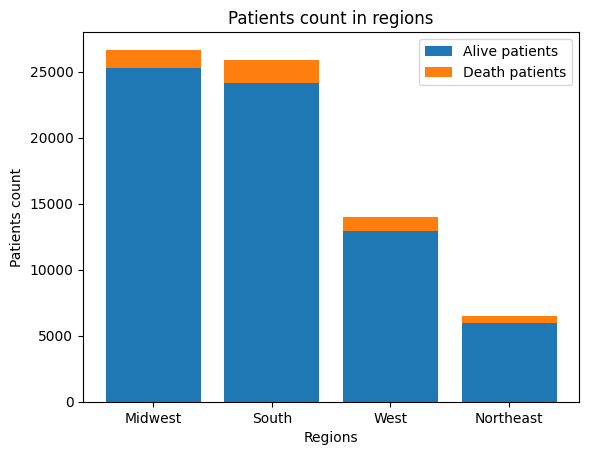

In [40]:
import matplotlib.pyplot as plt

plt.figure()
plt.title("Patients count in regions")
plt.bar(regions, alive_patients_count, label='Alive patients')
plt.bar(regions, death_patients_count, bottom=alive_patients_count, label='Death patients')
plt.legend()
plt.xlabel("Regions")
plt.ylabel("Patients count")
plt.show()

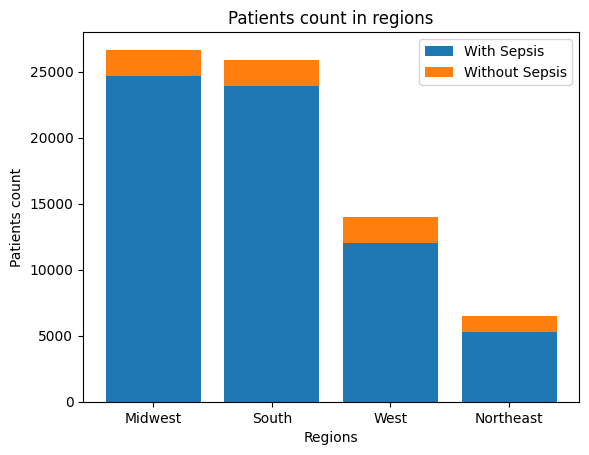

In [41]:
death_patients_count, alive_patients_count = [], []
for region in regions:
    region_id = region_ids[region]
    region_df = eicu_data.loc[eicu_data["regionid"] == region_id]
    alive_patients_count.append(len(region_df.loc[region_df["sepsis"] == 0]))
    death_patients_count.append(len(region_df.loc[region_df["sepsis"] == 1]))

import matplotlib.pyplot as plt

plt.figure()
plt.title("Patients count in regions")
plt.bar(regions, alive_patients_count, label='With Sepsis')
plt.bar(regions, death_patients_count, bottom=alive_patients_count, label='Without Sepsis')
plt.legend()
plt.xlabel("Regions")
plt.ylabel("Patients count")
plt.show()

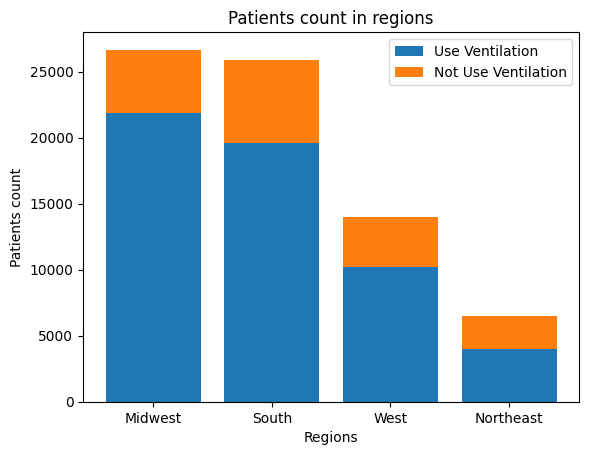

In [42]:
death_patients_count, alive_patients_count = [], []
for region in regions:
    region_id = region_ids[region]
    region_df = eicu_data.loc[eicu_data["regionid"] == region_id]
    alive_patients_count.append(len(region_df.loc[region_df["ventilation"] == 0]))
    death_patients_count.append(len(region_df.loc[region_df["ventilation"] == 1]))
import matplotlib.pyplot as plt

plt.figure()
plt.title("Patients count in regions")
plt.bar(regions, alive_patients_count, label='Use Ventilation')
plt.bar(regions, death_patients_count, bottom=alive_patients_count, label='Not Use Ventilation')
plt.legend()
plt.xlabel("Regions")
plt.ylabel("Patients count")
plt.show()

In [43]:
import numpy as np

eicu = eicu_data.to_numpy()
ids = eicu[:, 2]
x = eicu[:, 16:]
print(x)

random_ids = np.random.choice(np.arange(len(x)), 7500, replace=False)
x = x[random_ids]
ids = ids[random_ids]

print(ids)
print(x.shape)

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
[1. 0. 3. ... 1. 0. 2.]
(7500, 1411)


In [44]:
import umap.umap_ as umap

import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np


def draw_umap(n_neighbors, min_dist, target=None):

    reducer = umap.UMAP(n_neighbors=n_neighbors, n_components=2, min_dist=min_dist,
                        random_state=np.random.RandomState(25),
                        transform_seed=np.random.RandomState(25))
    principal_components = reducer.fit_transform(x)
    print(principal_components.shape)

    final_np = np.hstack((principal_components, ids[:, None]))
    print(final_np.shape)

    plt.figure(figsize=(8, 6))

    palette = ["#5de01f", "#1f5ce0", "#f29f18", "#f213be"]
    colors = sns.color_palette(palette, n_colors=4)
    for id, hospital_id in enumerate(list(np.unique(final_np[:, 2]))):

        print("id: {} hospital id: {}".format(id, hospital_id))

        scatter_rows = final_np[np.where(final_np[:, 2] == hospital_id)]
        scatter_rows = np.float32(scatter_rows[:, :2])

        if target is not None and float(target) != hospital_id:
            color = "#e1e1e1"
        else:
            color = colors[id]

        plot = plt.scatter(
            scatter_rows[:, 0], scatter_rows[:, 1], label=hospital_id, color=color, alpha=0.1)

    plt.title("UMAP Analysis for eICU Hospitals")
    plt.legend(loc="best", title="Hospital id", fancybox=True, shadow=True)
    plt.grid(True)
    plt.show()

    return final_np

n_neighbors: 5, min_dist: 0.1
(7500, 2)
(7500, 3)
id: 0 hospital id: 0.0
id: 1 hospital id: 1.0
id: 2 hospital id: 2.0
id: 3 hospital id: 3.0


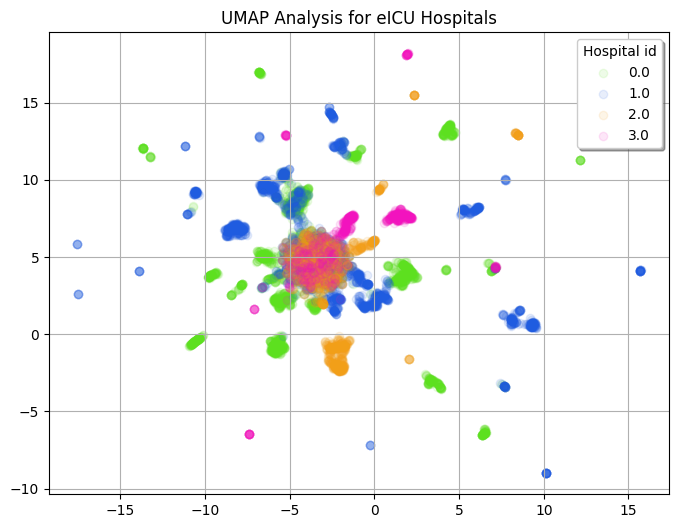

n_neighbors: 5, min_dist: 0.25
(7500, 2)
(7500, 3)
id: 0 hospital id: 0.0
id: 1 hospital id: 1.0
id: 2 hospital id: 2.0
id: 3 hospital id: 3.0


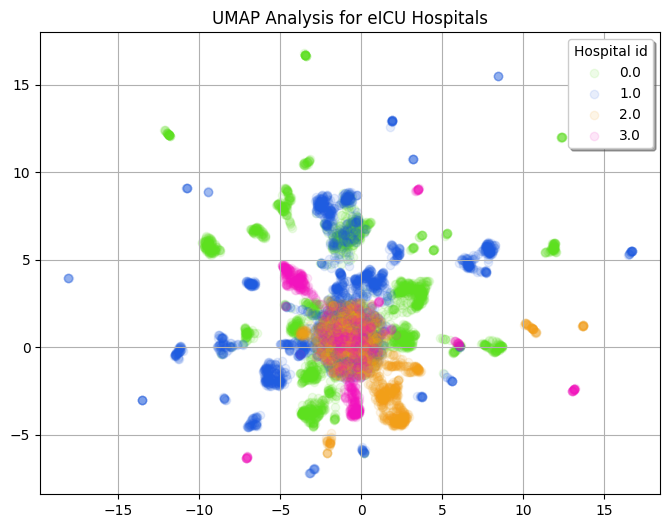

n_neighbors: 5, min_dist: 0.5
(7500, 2)
(7500, 3)
id: 0 hospital id: 0.0
id: 1 hospital id: 1.0
id: 2 hospital id: 2.0
id: 3 hospital id: 3.0


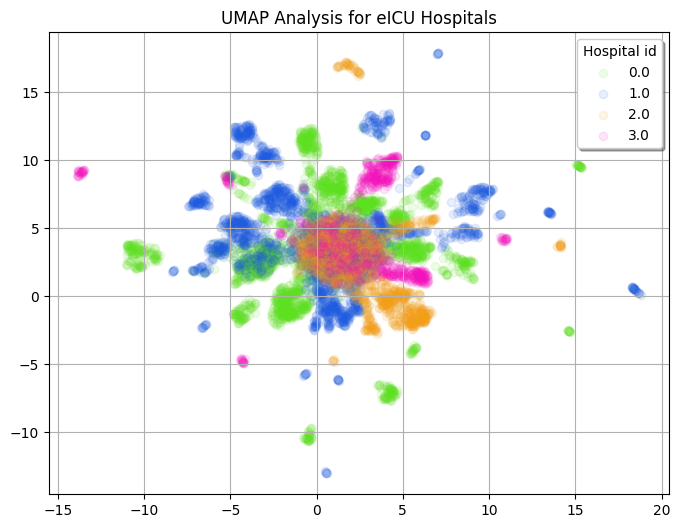

n_neighbors: 10, min_dist: 0.1
(7500, 2)
(7500, 3)
id: 0 hospital id: 0.0
id: 1 hospital id: 1.0
id: 2 hospital id: 2.0
id: 3 hospital id: 3.0


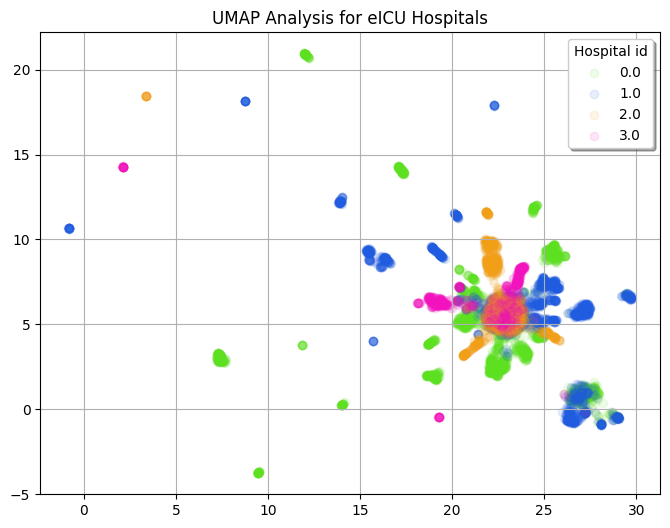

n_neighbors: 10, min_dist: 0.25
(7500, 2)
(7500, 3)
id: 0 hospital id: 0.0
id: 1 hospital id: 1.0
id: 2 hospital id: 2.0
id: 3 hospital id: 3.0


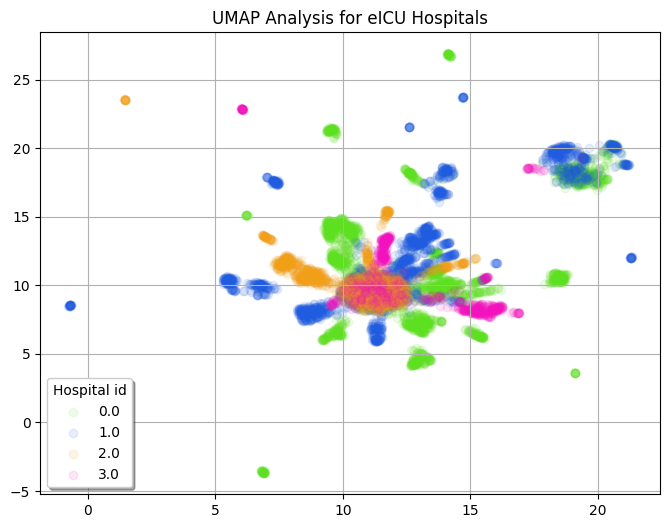

n_neighbors: 10, min_dist: 0.5
(7500, 2)
(7500, 3)
id: 0 hospital id: 0.0
id: 1 hospital id: 1.0
id: 2 hospital id: 2.0
id: 3 hospital id: 3.0


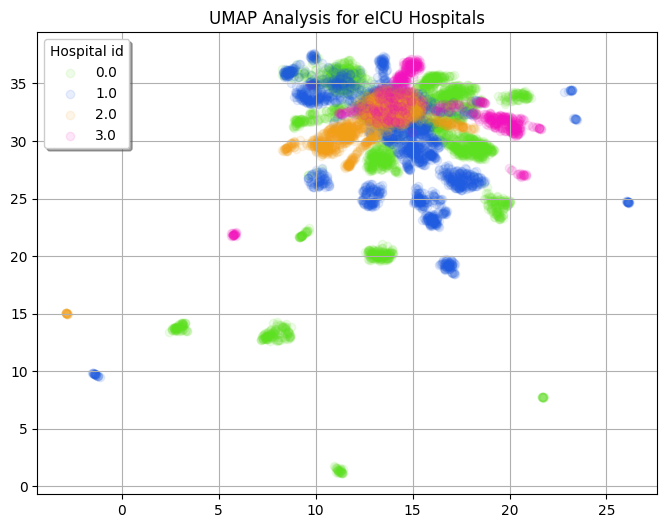

n_neighbors: 20, min_dist: 0.1
(7500, 2)
(7500, 3)
id: 0 hospital id: 0.0
id: 1 hospital id: 1.0
id: 2 hospital id: 2.0
id: 3 hospital id: 3.0


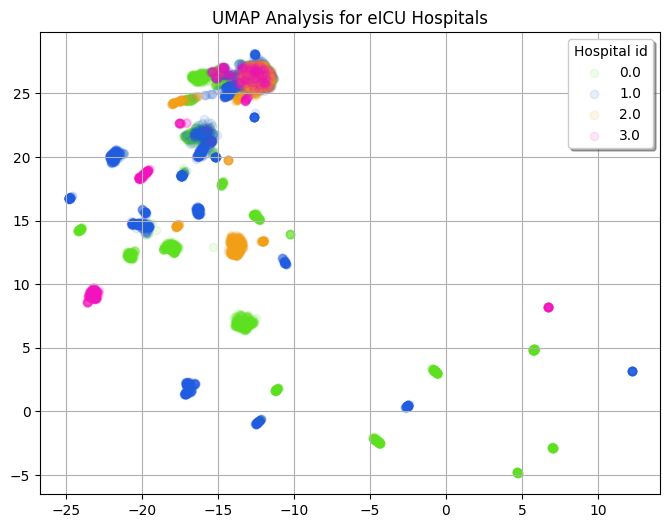

n_neighbors: 20, min_dist: 0.25
(7500, 2)
(7500, 3)
id: 0 hospital id: 0.0
id: 1 hospital id: 1.0
id: 2 hospital id: 2.0
id: 3 hospital id: 3.0


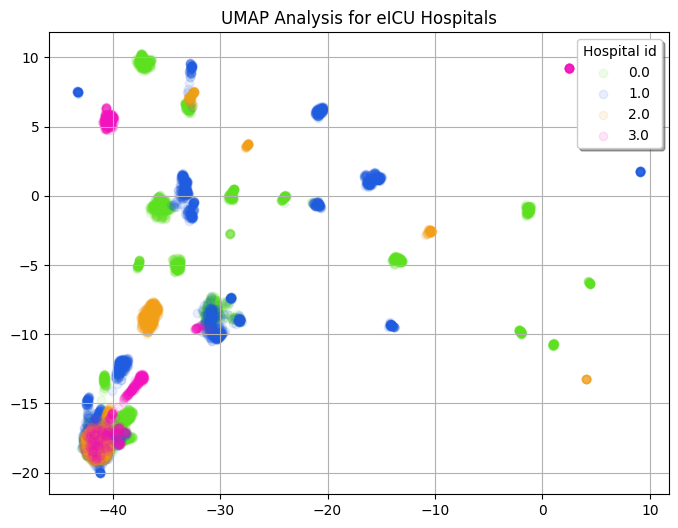

n_neighbors: 20, min_dist: 0.5
(7500, 2)
(7500, 3)
id: 0 hospital id: 0.0
id: 1 hospital id: 1.0
id: 2 hospital id: 2.0
id: 3 hospital id: 3.0


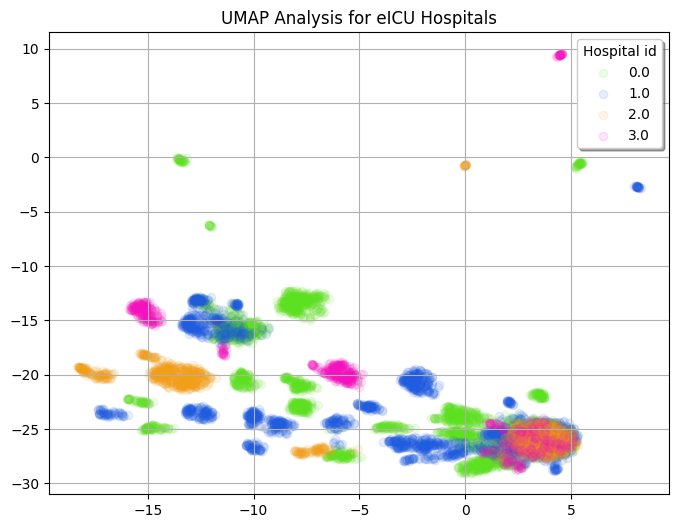

In [45]:
final_np = draw_umap(10, 0.5)

In [46]:
from sklearn.metrics.pairwise import pairwise_distances

avg_distance_dict = {}
idx = 0

for id in np.unique(ids):

    cluster1 = final_np[final_np[:,2] == id]
    cluster1 = cluster1[:,[0,1]]

    for neighbour_id in np.unique(ids):
        
        if neighbour_id == id:
            continue

        if str(int(id)) + " " + str(int(neighbour_id)) in avg_distance_dict:
            continue

        if str(int(neighbour_id)) + " " + str(int(id)) in avg_distance_dict:
            continue

        cluster2 = final_np[final_np[:,2] == neighbour_id]
        cluster2 = cluster2[:,[0,1]]

        distance = pairwise_distances(cluster1, cluster2)
        distances = distance.reshape(-1)
        avg_distances = np.mean(distances)
        avg_distances = avg_distances.item()
        avg_distance_dict[str(int(id)) + " " + str(int(neighbour_id))] = avg_distances
        idx += 1

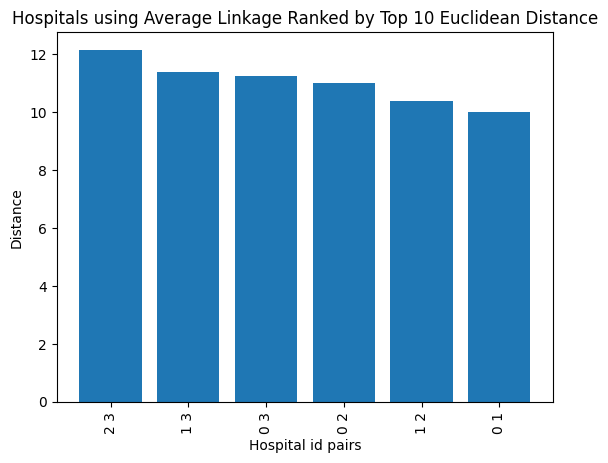

In [47]:
sorted_dict = sorted(avg_distance_dict.items(), key=lambda item: item[1], reverse=True)

keys = [elem[0] for elem in sorted_dict[:10]]
values = [elem[1] for elem in sorted_dict[:10]]

# plt.figure(figsize=(20, 8))
plt.title("Hospitals using Average Linkage Ranked by Top 10 Euclidean Distance")
plt.bar(keys,values)
plt.xticks(rotation=90)
plt.xlabel("Hospital id pairs")
plt.ylabel("Distance")
plt.show()

In [1]:
import pandas as pd

hospital_data = pd.read_csv("../data/eicu/hospital.csv.gz")

In [2]:
hospital_data.head()

,hospitalid,numbedscategory,teachingstatus,region
0,56,<100,f,Midwest
1,58,100 - 249,f,Midwest
2,59,<100,f,Midwest
3,60,<100,f,Midwest
4,61,<100,f,Midwest


In [4]:
hospital_data[hospital_data['hospitalid'].isin([420, 110, 122, 167, 183, 199, 243, 252, 281, 416, 443])]

,hospitalid,numbedscategory,teachingstatus,region
26,110,100 - 249,f,South
30,122,>= 500,f,South
54,167,>= 500,t,West
63,183,>= 500,f,South
71,199,>= 500,t,Northeast
90,243,>= 500,f,South
98,252,>= 500,t,Midwest
119,281,250 - 499,f,Midwest
181,416,>= 500,t,Midwest
184,420,>= 500,t,Northeast
